# Installing Dependencies

Installing Pyspark for dealing with bigdata


In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=9e21f1351ab3f41176c67266c5089c31d0f0ea01bf43d69fbf0020873f2e48b2
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In order to avoid uploading manually by running below codes we load data from kaggle by using API command


In [2]:
# install kaggle library
! pip install kaggle

#creating a directory named kaggle
! mkdir ~/.kaggle

# copying kaggle.json to new directory
! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

# downloading dataset
!kaggle datasets download -d mlg-ulb/creditcardfraud

#creating a new directory in order to unzip dataset overthere
!mkdir creditcardfraud

!unzip 'creditcardfraud.zip' -d /content/creditcardfraud

 86% 57.0M/66.0M [00:00<00:00, 210MB/s]
100% 66.0M/66.0M [00:00<00:00, 205MB/s]
Archive:  creditcardfraud.zip
  inflating: /content/creditcardfraud/creditcard.csv  


Installing elephas in order to implement deep learning using big data analytics

Importing necessary tools and modules

In [3]:
#numerical functions
import numpy as np

#to create a dataframe for basic EDA
import pandas as pd

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#PySpark tools
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, explode, array, lit
from pyspark.ml.feature import VectorAssembler #selecting features to assemble as a vectore
from pyspark.ml.classification import LogisticRegression #Logistic Regression
from pyspark.ml.classification import LinearSVC #Support Vector Machine
from pyspark.ml.classification import DecisionTreeClassifier #Decision Tree
from pyspark.ml.classification import RandomForestClassifier #Random Forest
from pyspark.ml.classification import GBTClassifier #Gradient Boosted Tree
from pyspark.ml.classification import MultilayerPerceptronClassifier #Multi Layer Perceptron

# Exploratory Data Analysis

For basic data analysis we use pandas

In [4]:
df = pd.read_csv('/content/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Visualizing features

Histogram<br>
Density Plot

In [10]:
df_nonfraud = df[df['Class']==0]
df_fraud = df[df['Class']==1]
print(df_nonfraud.shape)
print(df_fraud.shape)

(284315, 31)
(492, 31)


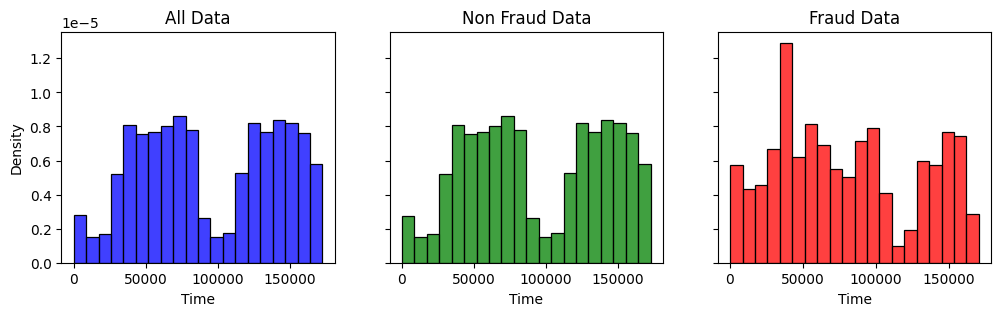

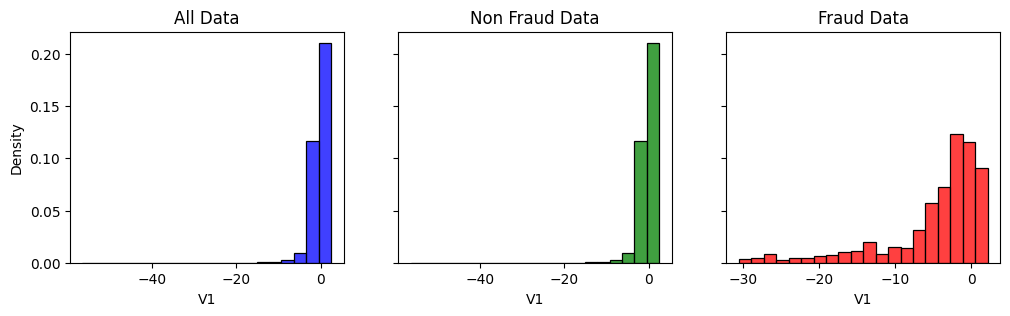

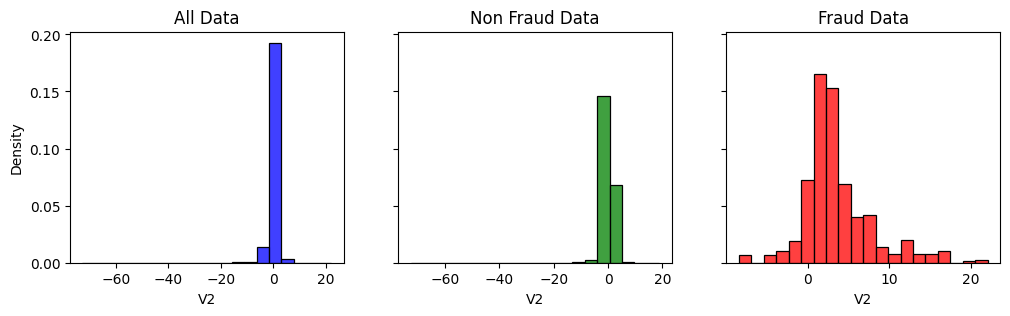

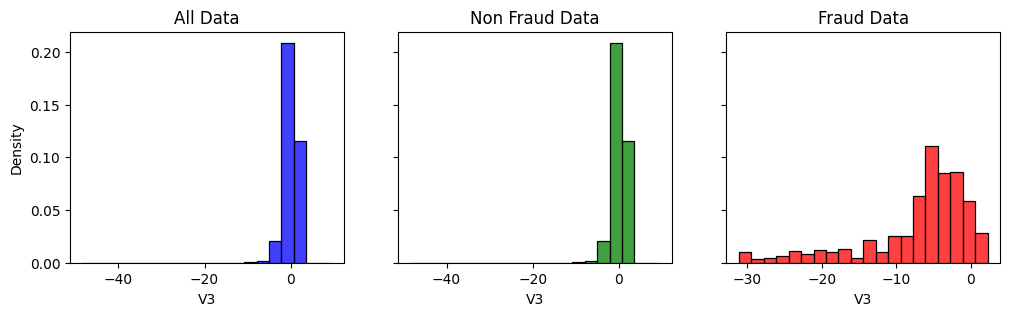

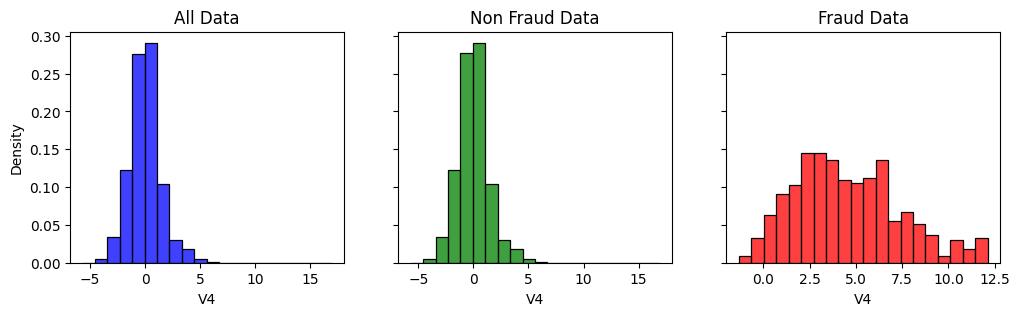

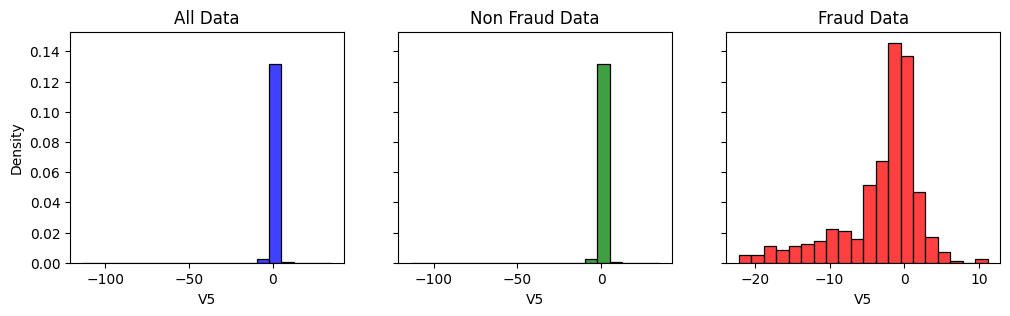

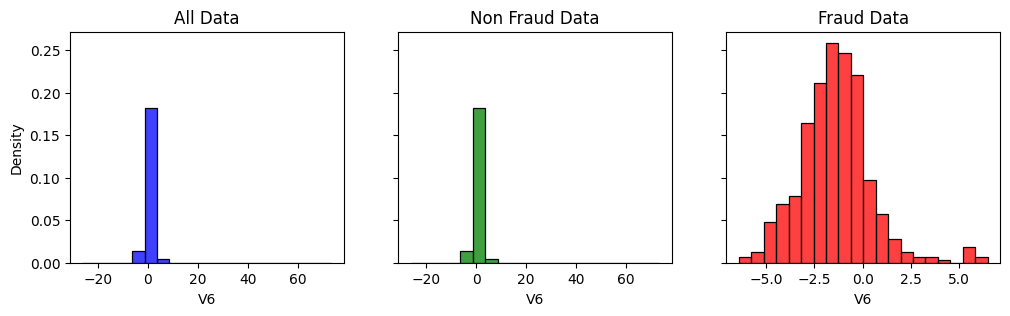

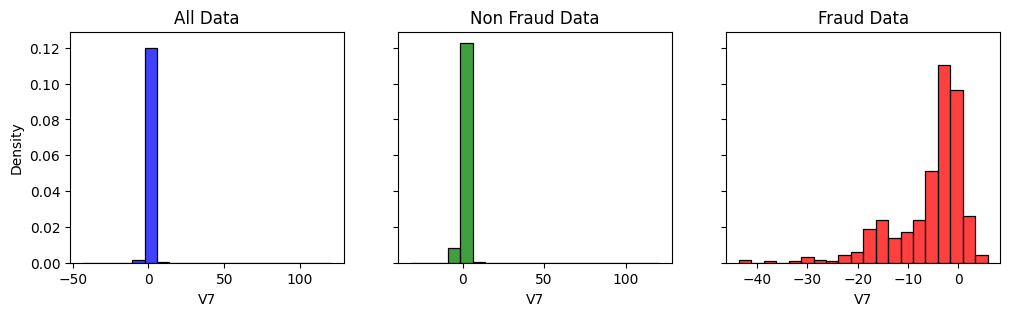

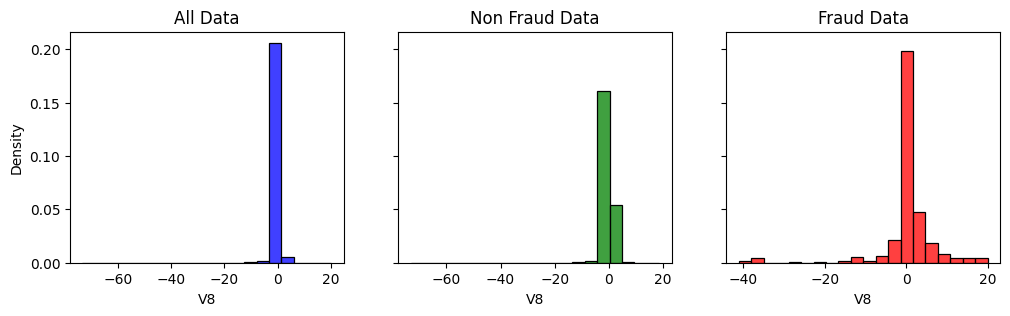

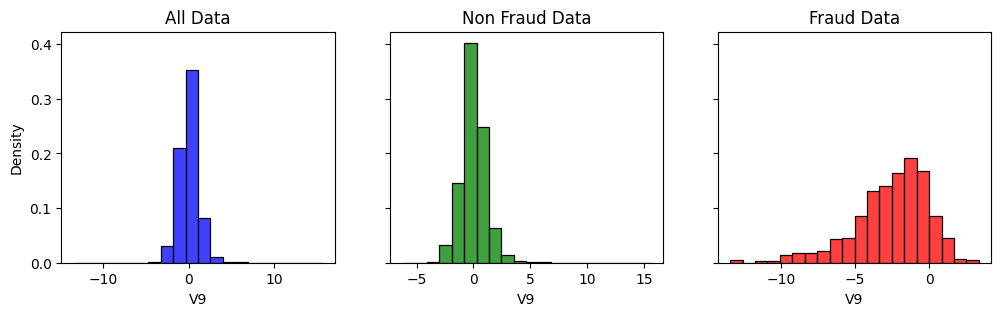

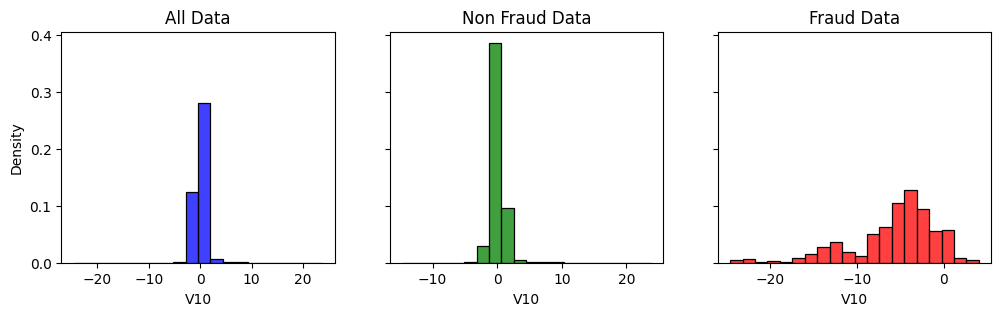

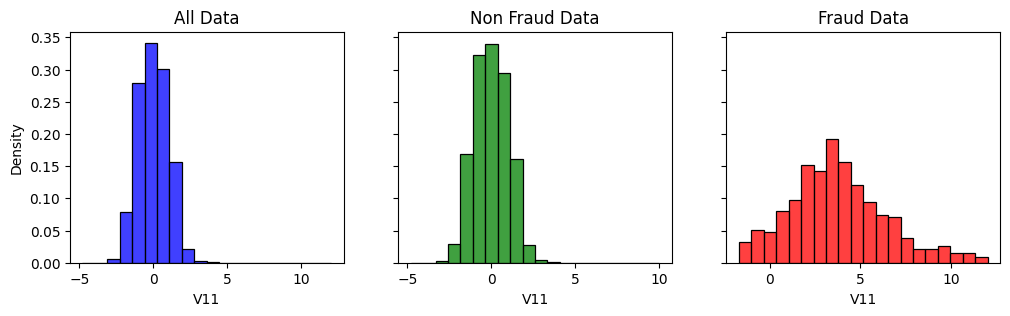

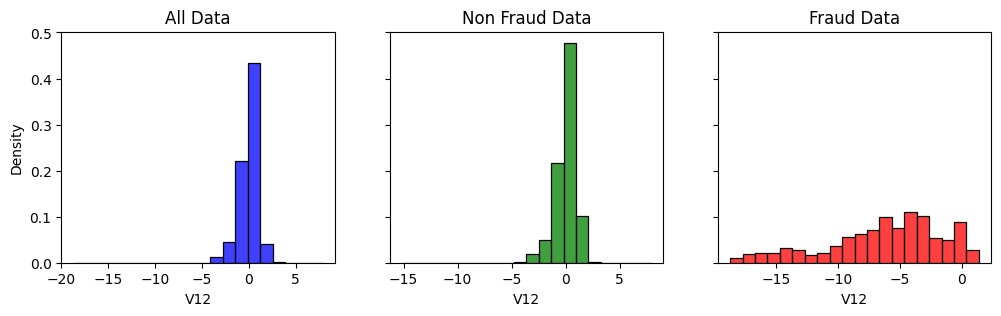

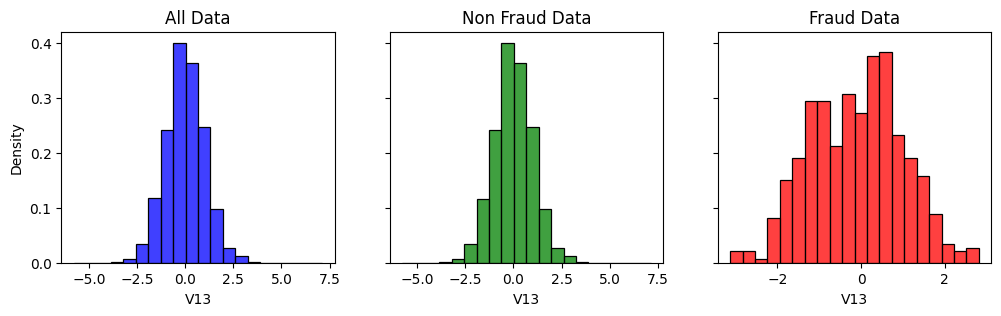

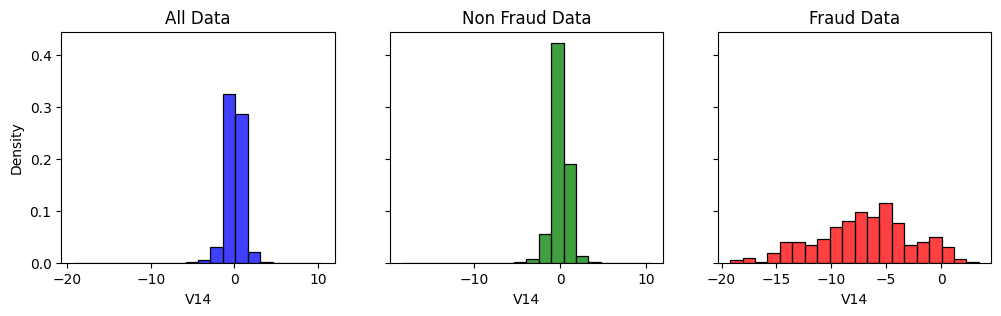

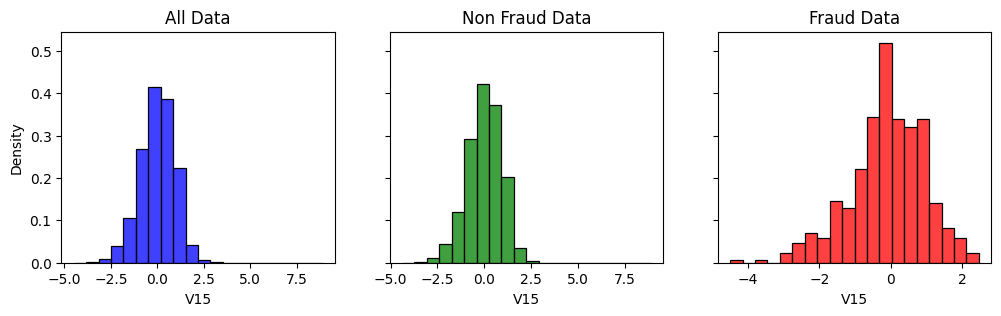

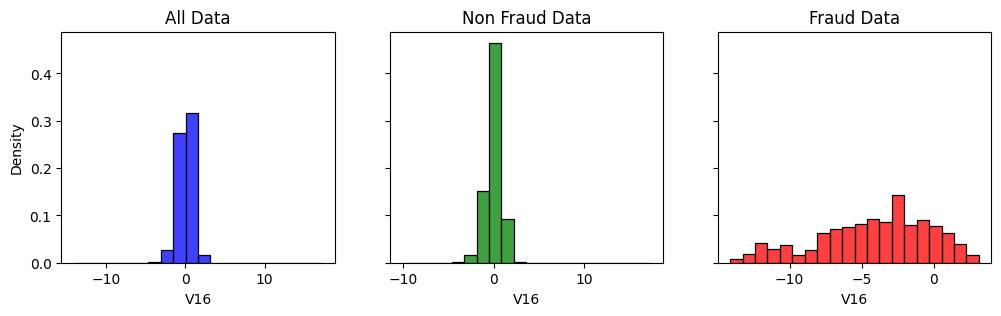

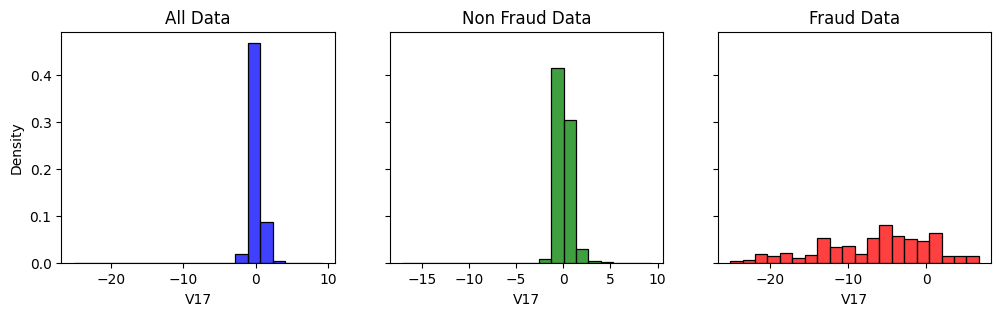

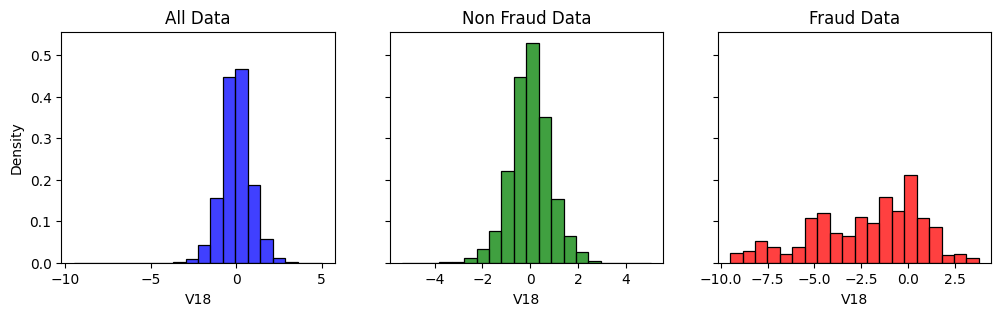

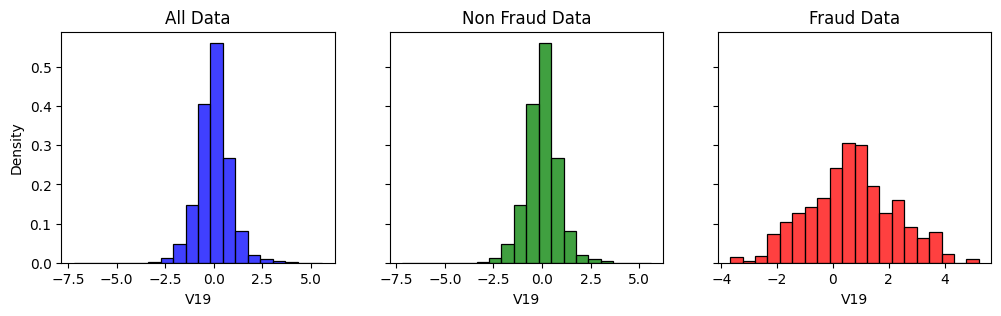

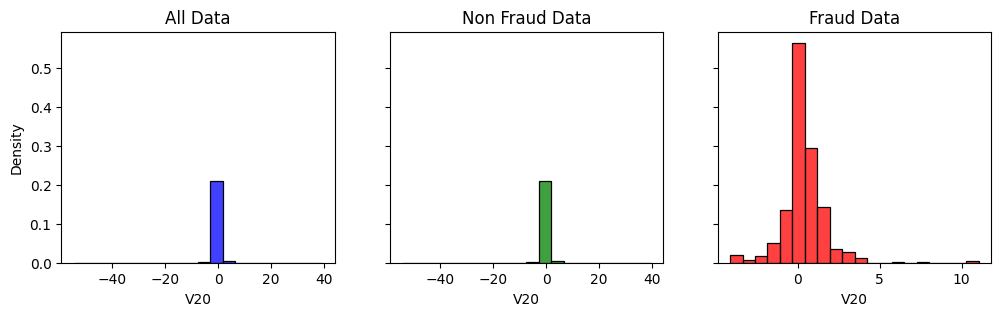

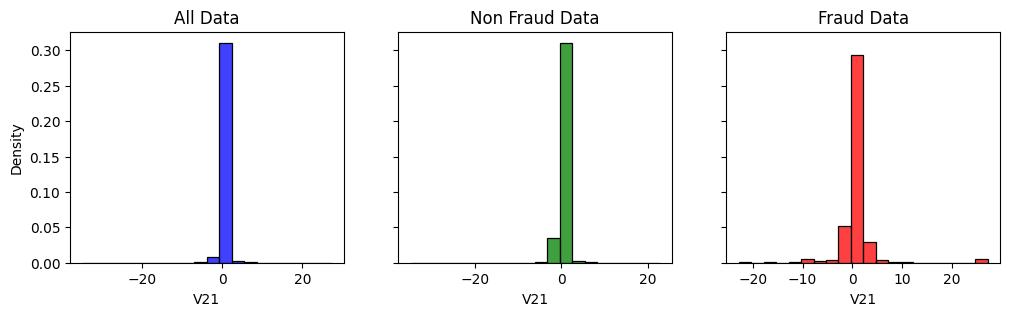

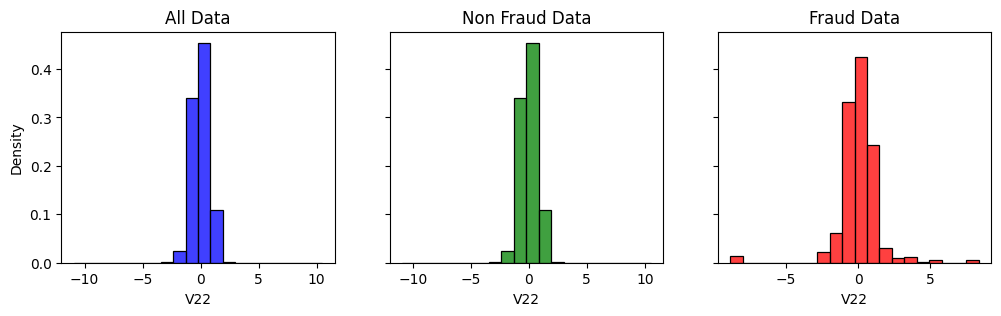

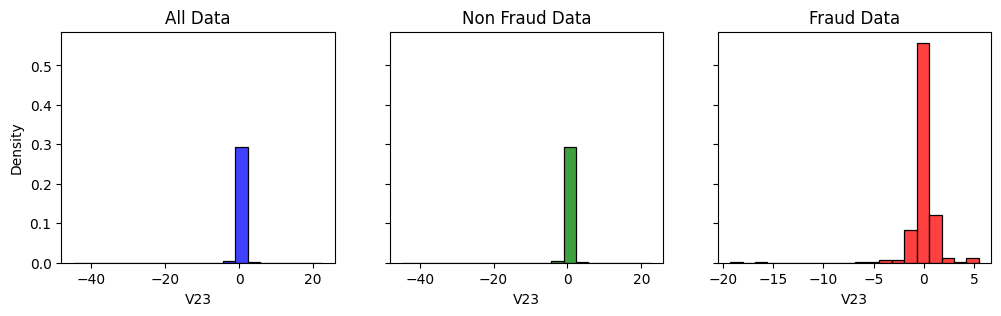

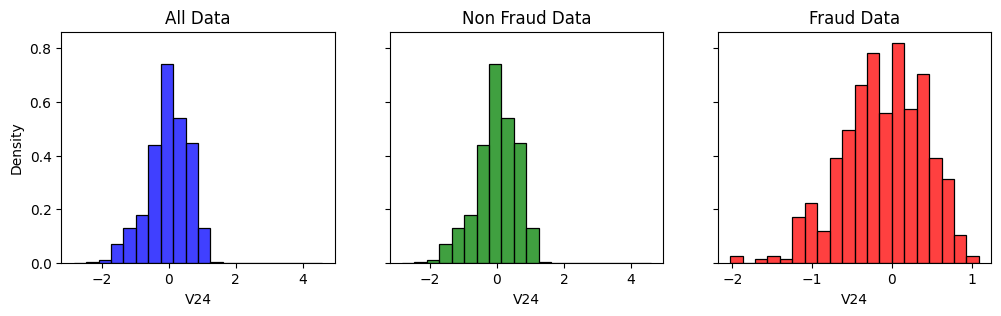

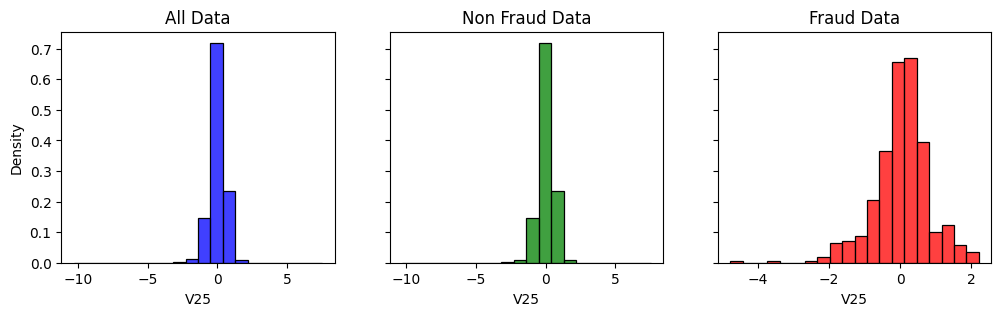

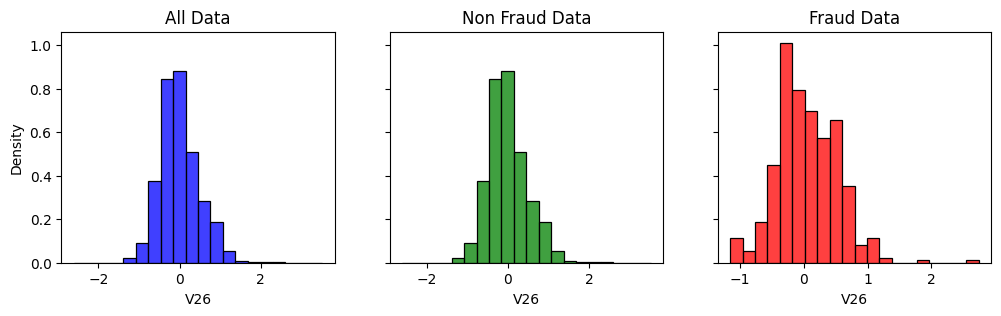

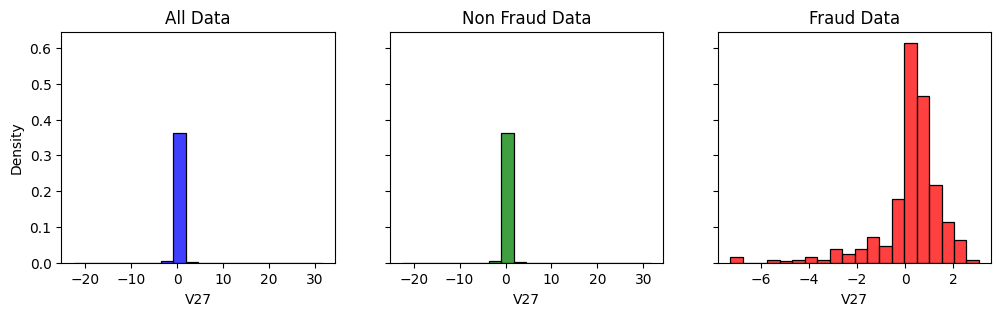

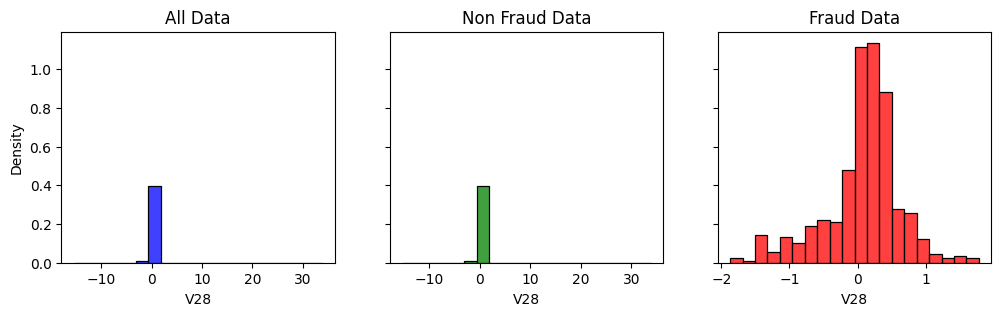

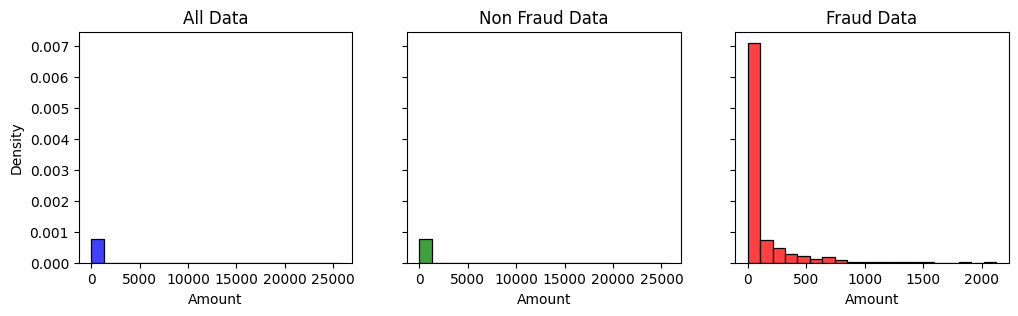

In [11]:
for i in range(len(df.columns)-1):
  fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
  sns.histplot(ax=axes[0], data=df[df.columns[i]], bins = 20, color='blue', stat='density')
  axes[0].set_title('All Data')
  sns.histplot(ax=axes[1], data=df_nonfraud[df_nonfraud.columns[i]], bins = 20, color='green', stat='density')
  axes[1].set_title('Non Fraud Data')
  sns.histplot(ax=axes[2], data=df_fraud[df_fraud.columns[i]], bins = 20, color='red', stat='density')
  axes[2].set_title('Fraud Data')

  plt.show()

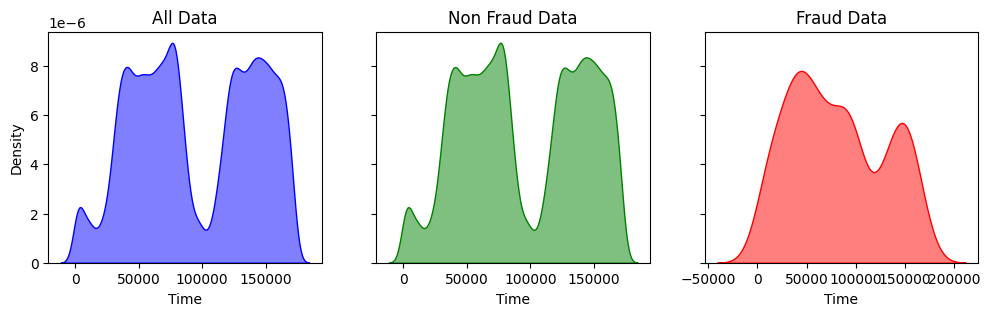

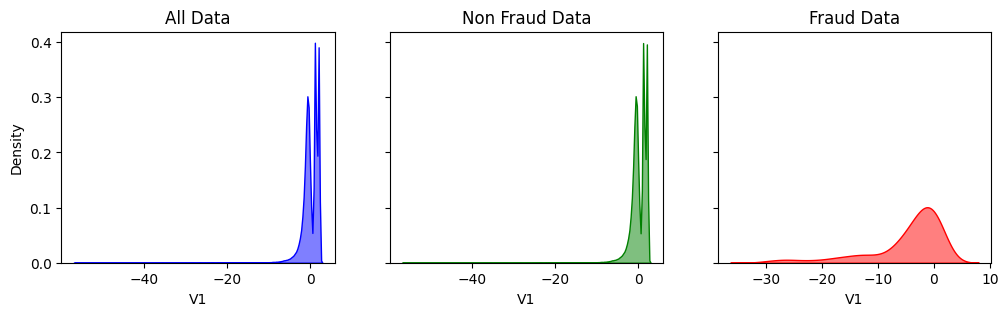

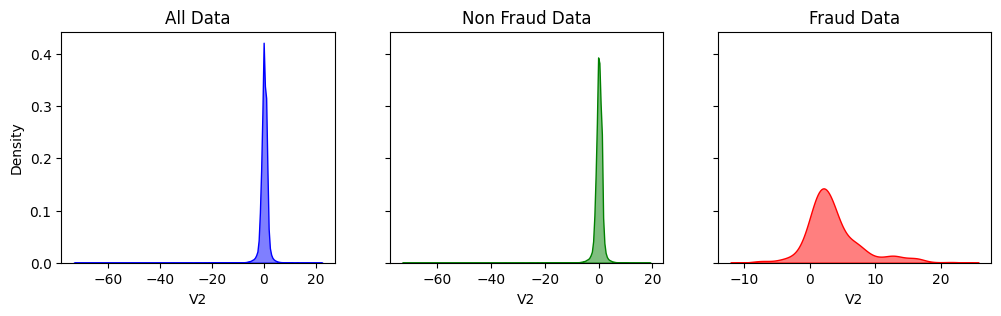

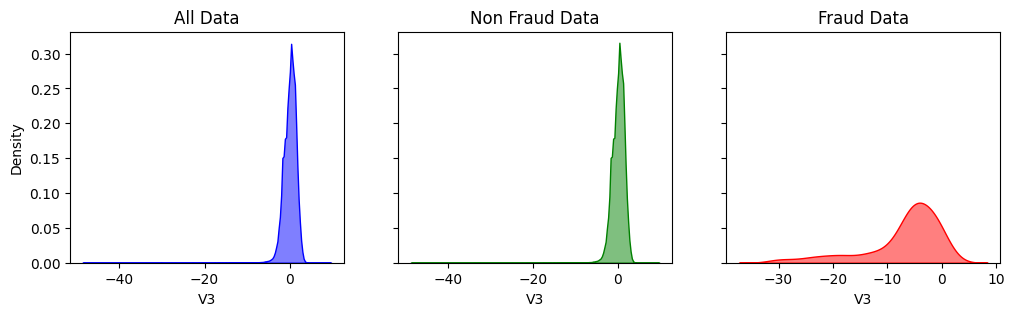

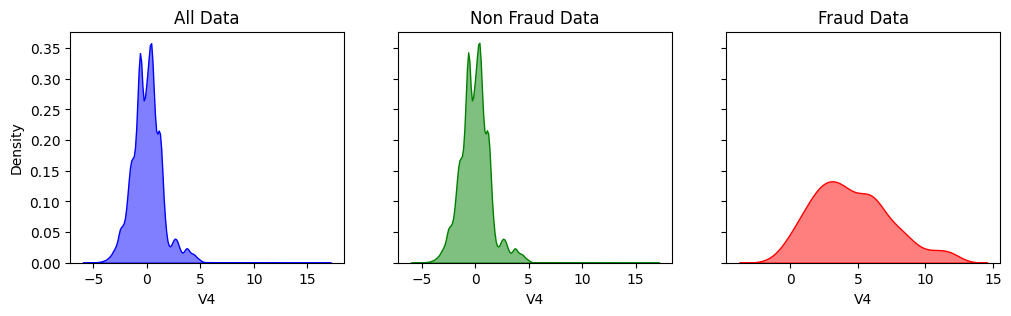

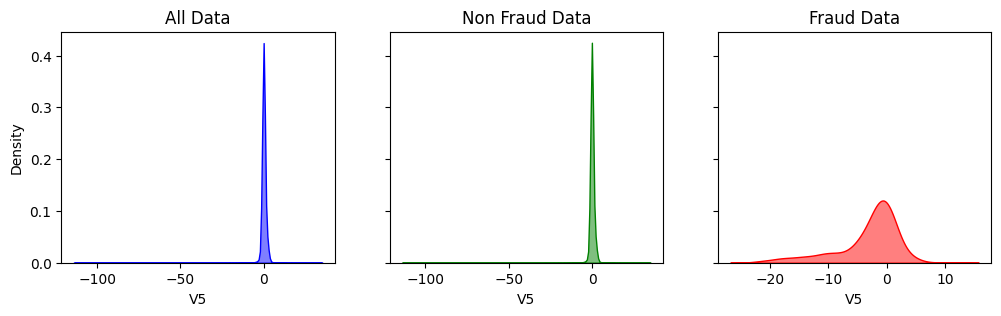

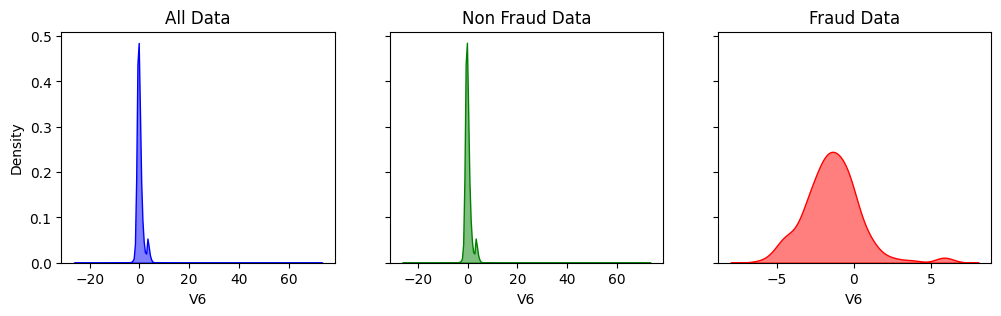

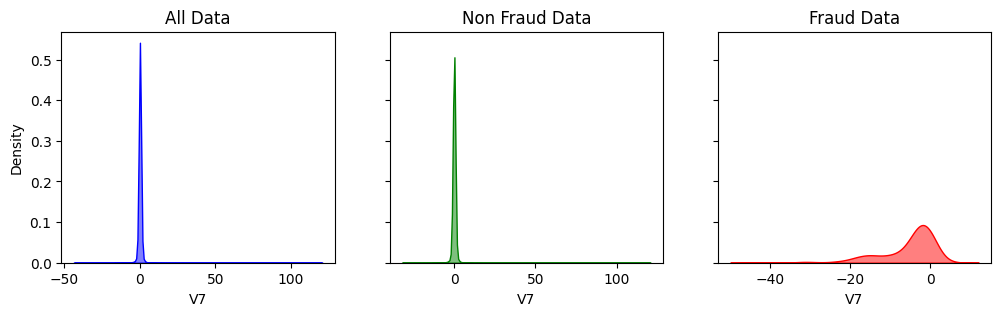

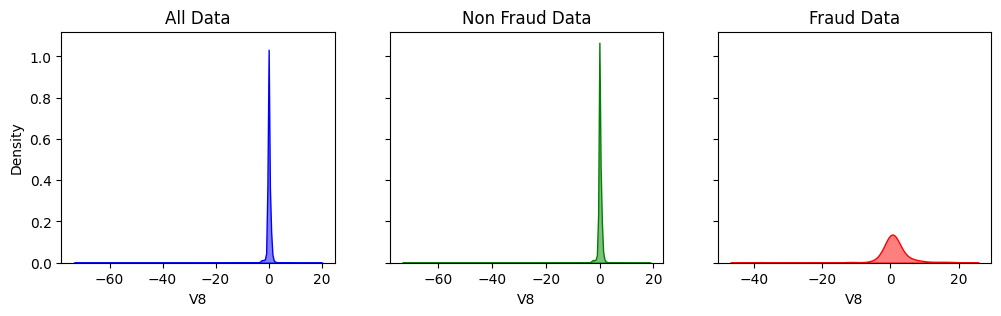

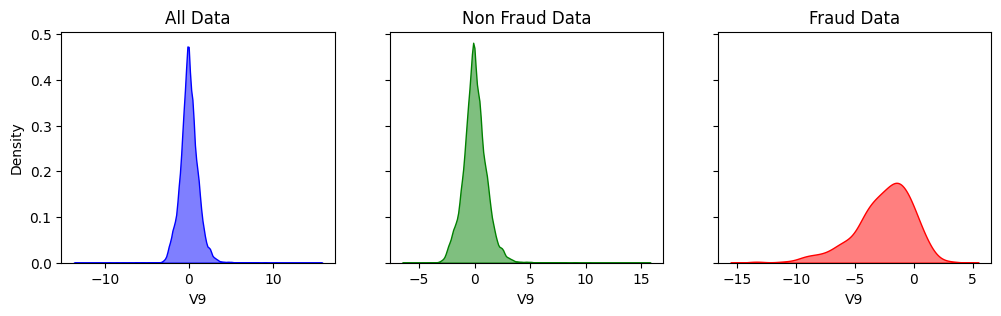

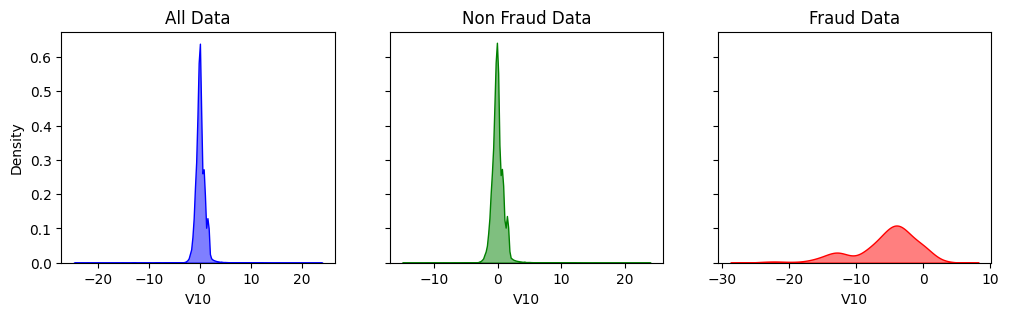

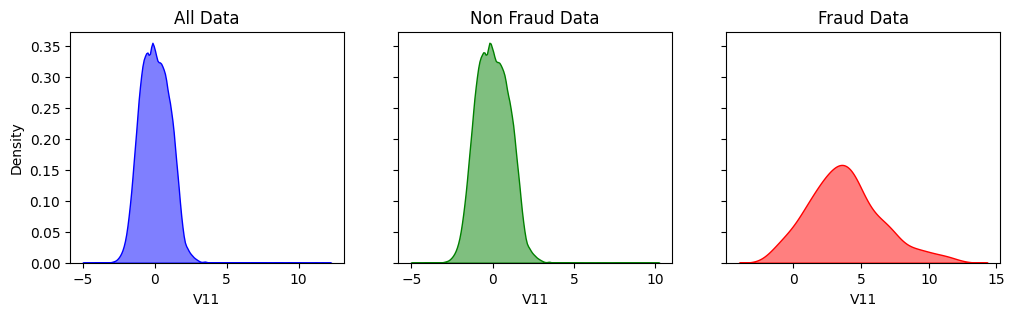

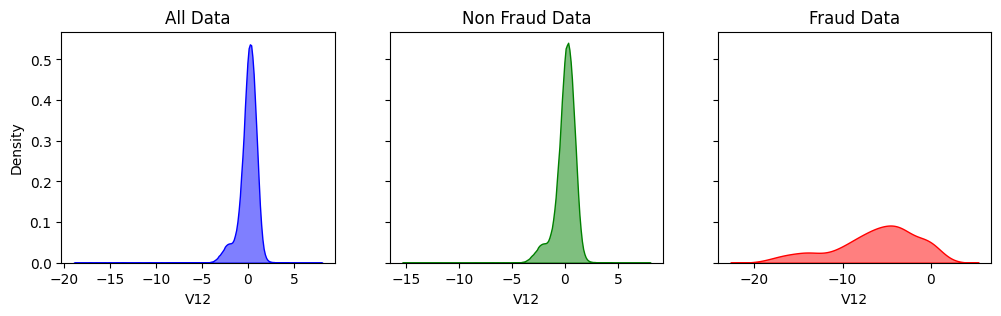

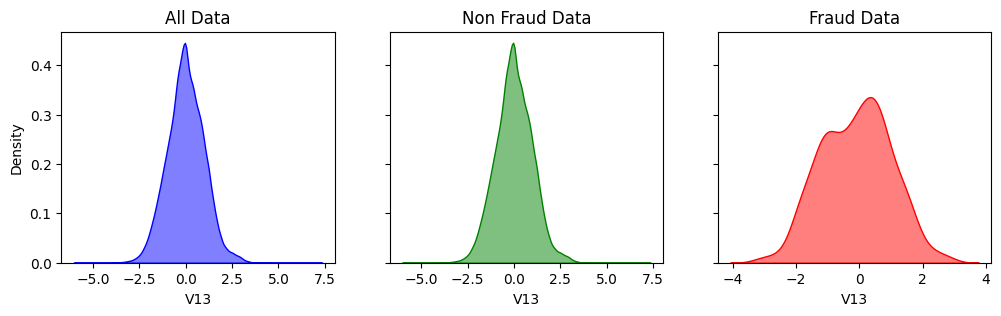

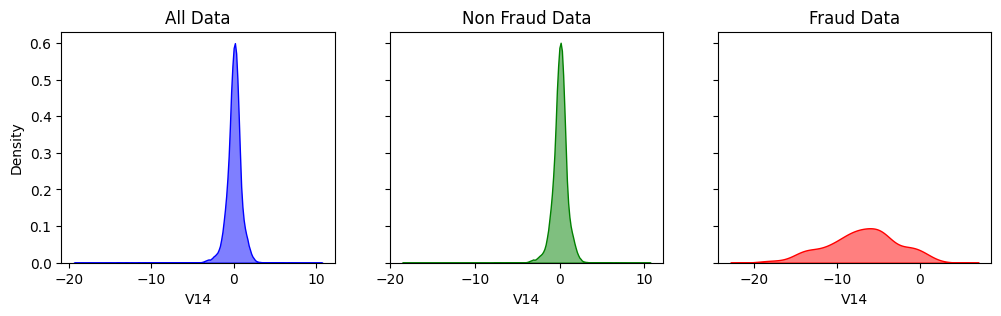

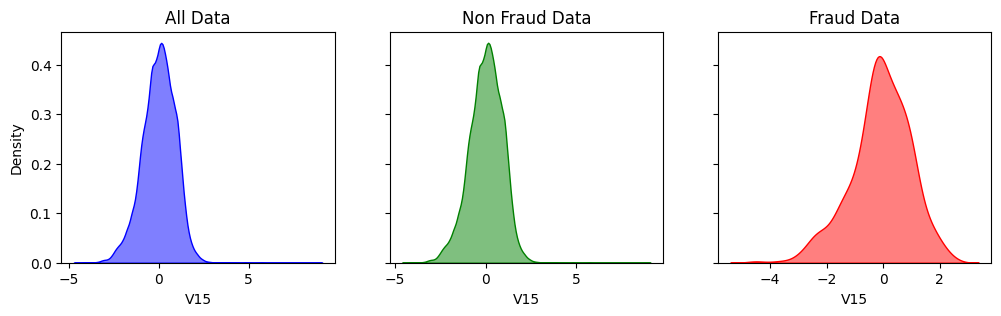

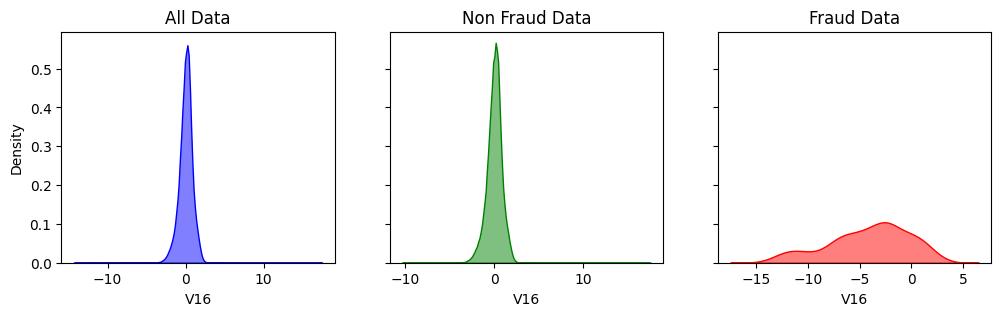

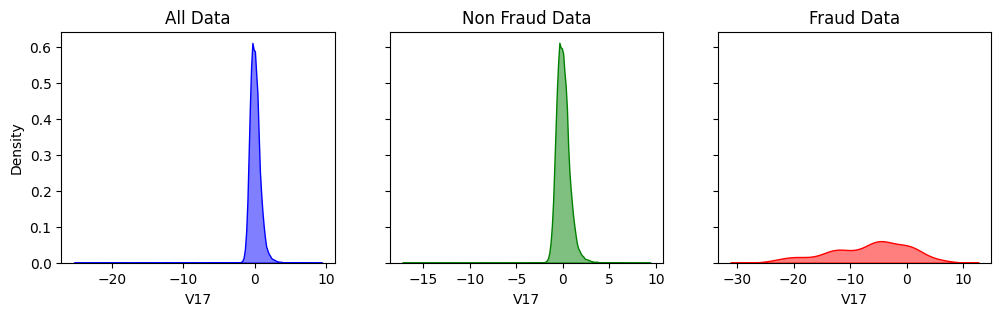

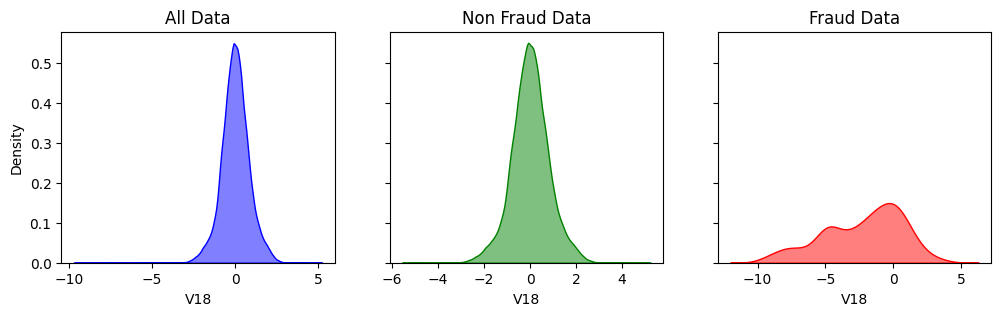

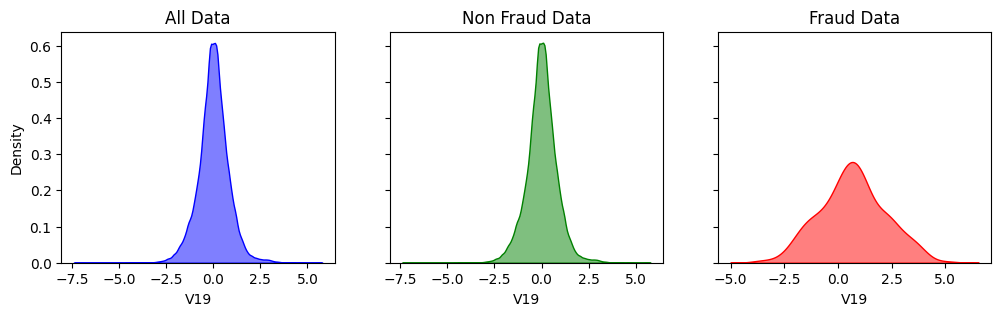

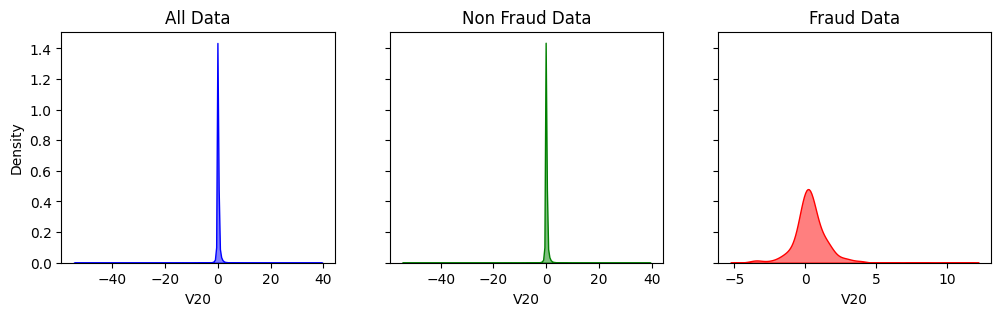

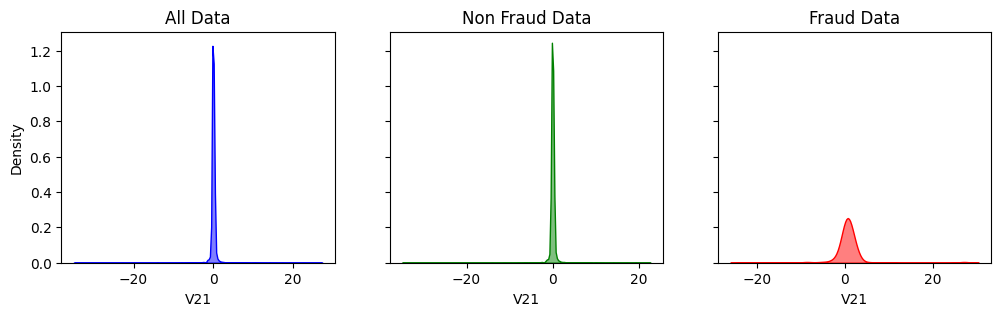

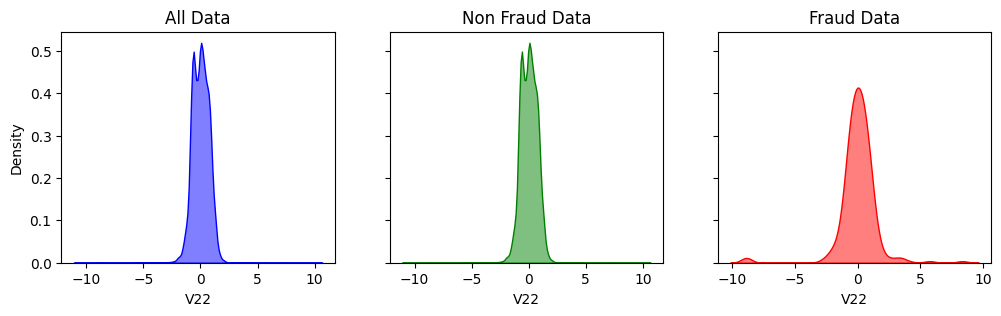

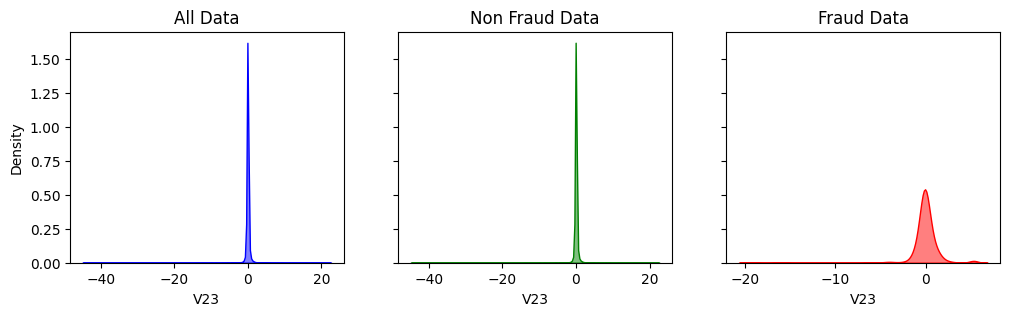

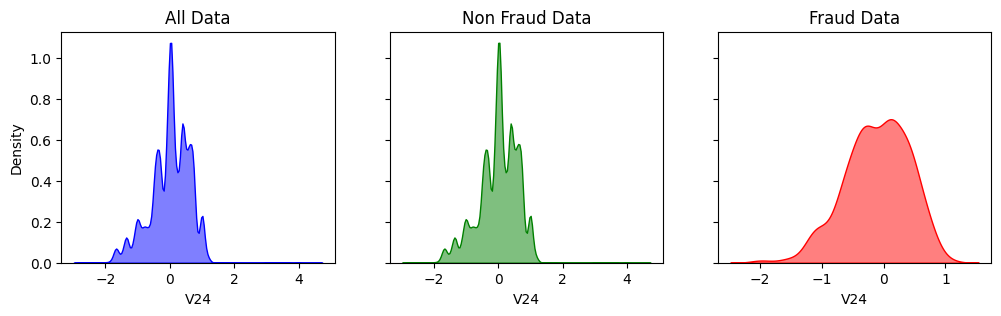

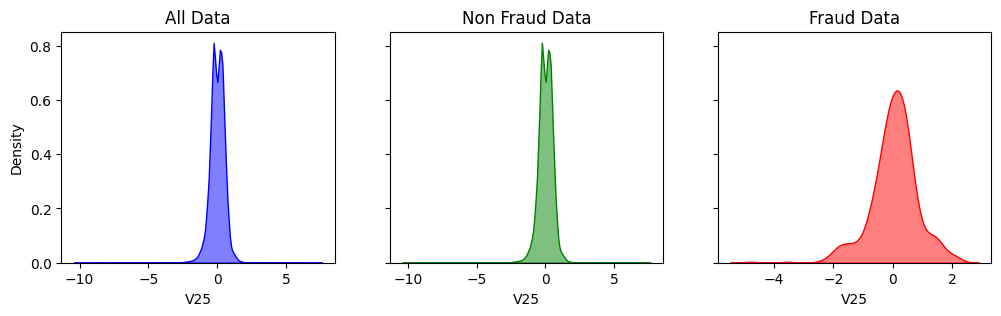

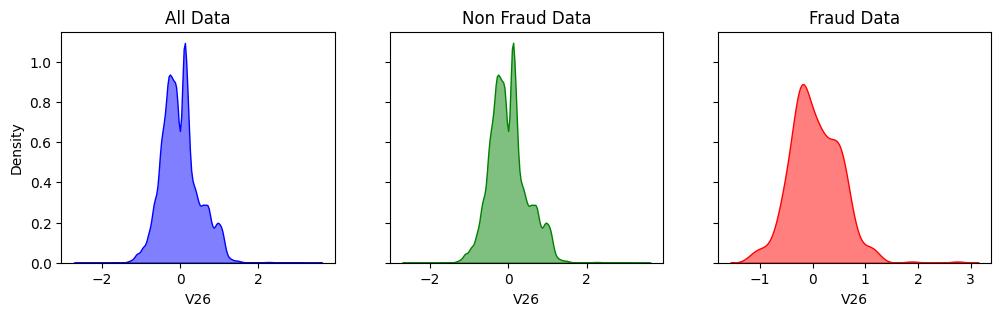

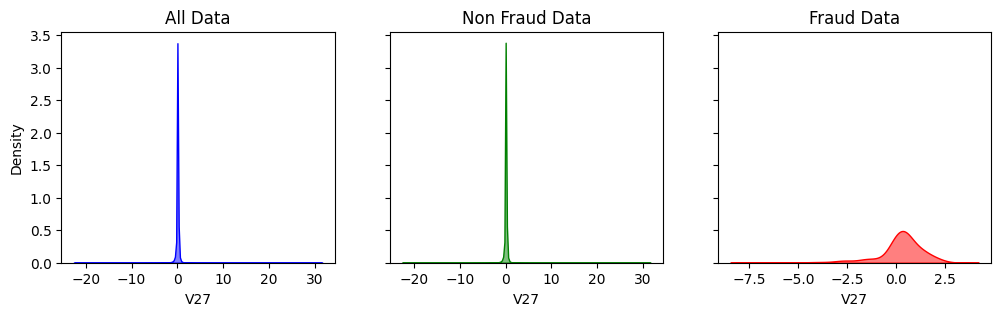

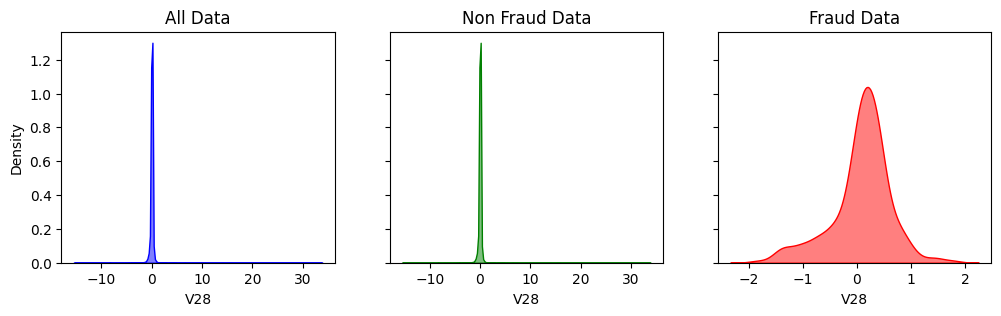

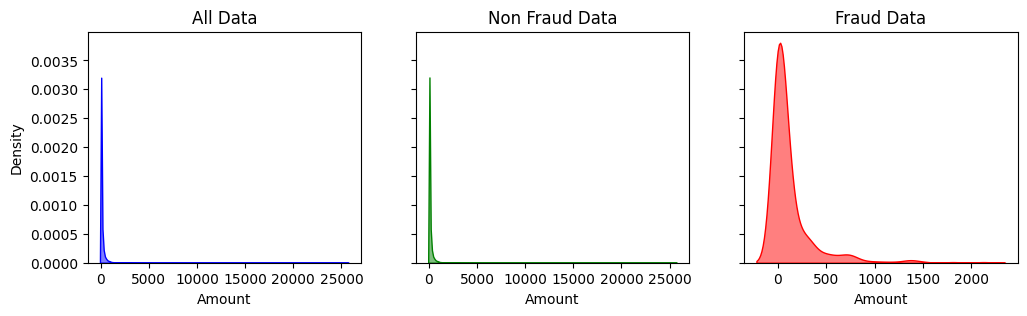

In [12]:
for i in range(len(df.columns)-1):
  fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
  sns.kdeplot(ax=axes[0], data=df[df.columns[i]], fill=True, common_norm=False, color='blue', alpha=.5)
  axes[0].set_title('All Data')
  sns.kdeplot(ax=axes[1], data=df_nonfraud[df_nonfraud.columns[i]], fill=True, common_norm=False, color='green', alpha=.5)
  axes[1].set_title('Non Fraud Data')
  sns.kdeplot(ax=axes[2], data=df_fraud[df_fraud.columns[i]], fill=True, common_norm=False, color='red', alpha=.5)
  axes[2].set_title('Fraud Data')

  plt.show()

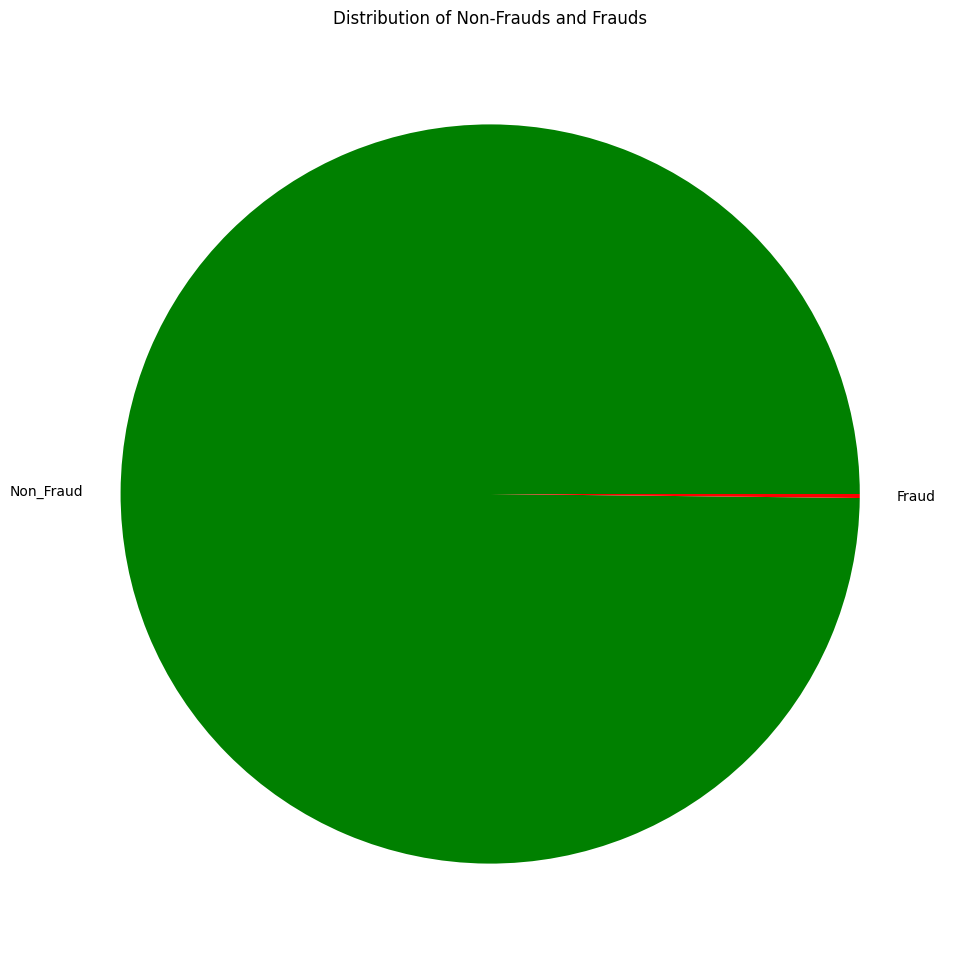

In [13]:
data_pie = [df[df['Class']==0].shape[0], df[df['Class']==1].shape[0]]
labels_pie = ['Non_Fraud', 'Fraud']

plt.figure(figsize=(12,12))
colors_pie = ['green', 'red']
plt.pie(data_pie, labels = labels_pie, colors = colors_pie)
plt.title("Distribution of Non-Frauds and Frauds")

plt.show()

In [14]:
df['Class'].value_counts(normalize=True) * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

# Classic Machine Learning

Now we use pyspark to oversample data and implement Machine Learning models

first we import our dataset as a pyspark dataframe

In [15]:
spark = SparkSession.builder.appName('Read CSV File into DataFrame').getOrCreate()

df1 = spark.read.csv('/content/creditcardfraud/creditcard.csv', sep=',', inferSchema=True, header=True)


In [16]:
df1.show(5)

+----+------------------+-------------------+----------------+------------------+-------------------+-------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+--------------------+-------------------+------------------+------------------+------------------+------------------+--------------------+-------------------+------+-----+
|Time|                V1|                 V2|              V3|                V4|                 V5|                 V6|                 V7|                V8|                V9|                V10|               V11|               V12|               V13|               V14|               V15|               V16|               V17|                V18|               V19|                V20|                 V21|                V22|     

In [17]:
df1.count()

284807

## Vector Assembler

In [18]:
features_list = df1.select(df1.columns[:-1])

assembler = VectorAssembler(inputCols = features_list.columns, outputCol='features')
output = assembler.transform(df1)

In [19]:
#creating a final dataset to deal with
df_final = output.select('features', 'Class')
df_final.show()

+--------------------+-----+
|            features|Class|
+--------------------+-----+
|[0.0,-1.359807133...|    0|
|[0.0,1.1918571113...|    0|
|[1.0,-1.358354061...|    0|
|[1.0,-0.966271711...|    0|
|[2.0,-1.158233093...|    0|
|[2.0,-0.425965884...|    0|
|[4.0,1.2296576345...|    0|
|[7.0,-0.644269442...|    0|
|[7.0,-0.894286082...|    0|
|[9.0,-0.338261752...|    0|
|[10.0,1.449043781...|    0|
|[10.0,0.384978215...|    0|
|[10.0,1.249998742...|    0|
|[11.0,1.069373587...|    0|
|[12.0,-2.79185476...|    0|
|[12.0,-0.75241704...|    0|
|[12.0,1.103215435...|    0|
|[13.0,-0.43690507...|    0|
|[14.0,-5.40125766...|    0|
|[15.0,1.492935976...|    0|
+--------------------+-----+
only showing top 20 rows



## train test split

In [20]:
#splitting dataset to train and test
train_df, test_df = df_final.randomSplit(weights=[0.8,0.2], seed=100)
print('train size is:', train_df.count())
print('test size is:', test_df.count())

train size is: 227536
test size is: 57271


## Classification report function

In [21]:
class result():
  def __init__(self, prediction):
    self.prediction = prediction


    TP = prediction.filter((col("Class") == 0) & (col("prediction") == 0)).count()
    FN = prediction.filter((col("Class") == 0) & (col("prediction") == 1)).count()
    FP = prediction.filter((col("Class") == 1) & (col("prediction") == 0)).count()
    TN = prediction.filter((col("Class") == 1) & (col("prediction") == 1)).count()

    self.accuracy = (TP+TN)/(TP+FN+FP+TN)
    if TP+FP == 0:
      self.precision0 = 'undefiend(0/0)'
    else:
      self.precision0 = TP/(TP+FP)
    if TP+FN == 0:
      self.recall0 = 'undefiend(0/0)'
    else:
      self.recall0 = TP/(TP+FN)
    if TP+FP == 0 or TP+FN == 0:
      self.F1_score0 = 'undefiend(0/0)'
    else:
      self.F1_score0 = (2*self.precision0*self.recall0)/(self.precision0+self.recall0)

    if TN+FN == 0:
      self.precision1 = 'undefiend(0/0)'
    else:
      self.precision1 = TN/(TN+FN)
    if TN+FP == 0:
      self.recall1 = 'undefiend(0/0)'
    else:
      self.recall1 = TN/(TN+FP)
    if TN+FN == 0 or TN+FP == 0:
      self.F1_score1 = 'undefiend(0/0)'
    else:
      self.F1_score1 = (2*self.precision1*self.recall1)/(self.precision1+self.recall1)


    conf_mat = {'Non Fraud': [TP,FN],
                'Fraud': [FP,TN]}
    conf_mat = pd.DataFrame(conf_mat)
    conf_mat.index = ['Predicted Non Fraud', 'Predicted Fraud']
    self.confusion_matrix = conf_mat

    results = {'Accuracy' : [self.accuracy, ''],
               'Precision' : [self.precision0, self.precision1],
               'Recall' : [self.recall0, self.recall1],
               'F1_Score' : [self.F1_score0, self.F1_score1]}
    results = pd.DataFrame(results)
    results.index = ['Non Fraud', 'Fraud']
    self.classification_results = results



## Logistic Regression

In [22]:
def best_param_LR(train, test):
  regParam = [0.0, 0.3, 0.5, 0.8]
  elasticNetParam = [0.0, 0.3, 0.5, 0.8, 1.0]
  for i in regParam:
    for j in elasticNetParam:
      LR = LogisticRegression(featuresCol = 'features', labelCol = 'Class', regParam = i, elasticNetParam = j)
      LRmodel = LR.fit(train)
      LR_predictions = LRmodel.transform(test)
      f1 = result(LR_predictions).F1_score1
      recall = result(LR_predictions).recall1
      print('for regParam of {0} and elasticNetParam of {1} F1 score is {2} and recall is {3}'.format(i, j, f1, recall))

In [23]:
best_param_LR(train_df, test_df)

for regParam of 0.0 and elasticNetParam of 0.0 F1 score is 0.7802197802197803 and recall is 0.71
for regParam of 0.0 and elasticNetParam of 0.3 F1 score is 0.7802197802197803 and recall is 0.71
for regParam of 0.0 and elasticNetParam of 0.5 F1 score is 0.7802197802197803 and recall is 0.71
for regParam of 0.0 and elasticNetParam of 0.8 F1 score is 0.7802197802197803 and recall is 0.71
for regParam of 0.0 and elasticNetParam of 1.0 F1 score is 0.7802197802197803 and recall is 0.71
for regParam of 0.3 and elasticNetParam of 0.0 F1 score is undefiend(0/0) and recall is 0.0
for regParam of 0.3 and elasticNetParam of 0.3 F1 score is undefiend(0/0) and recall is 0.0
for regParam of 0.3 and elasticNetParam of 0.5 F1 score is undefiend(0/0) and recall is 0.0
for regParam of 0.3 and elasticNetParam of 0.8 F1 score is undefiend(0/0) and recall is 0.0
for regParam of 0.3 and elasticNetParam of 1.0 F1 score is undefiend(0/0) and recall is 0.0
for regParam of 0.5 and elasticNetParam of 0.0 F1 score

In [85]:
lr = LogisticRegression(featuresCol = 'features', labelCol = 'Class', regParam = 0, elasticNetParam = 0)
lrmodel = lr.fit(train_df)

In [86]:
lr_predictions = lrmodel.transform(test_df)

In [87]:
result(lr_predictions).confusion_matrix

,Non Fraud,Fraud
Predicted Non Fraud,57160,29
Predicted Fraud,11,71


In [88]:
result(lr_predictions).classification_results

,Accuracy,Precision,Recall,F1_Score
Non Fraud,0.999302,0.999493,0.999808,0.99965
Fraud,,0.865854,0.710000,0.78022


## SVM

In [28]:
def best_param_SVM(train, test):
  regParam = [0.0, 0.3, 0.5, 0.8]
  aggregationDepth = [2, 3, 4, 5]
  for i in regParam:
    for j in aggregationDepth:
      SVM = LinearSVC(featuresCol = 'features', labelCol = 'Class', regParam = i, aggregationDepth = j)
      SVMmodel = SVM.fit(train)
      SVM_predictions = SVMmodel.transform(test)
      f1 = result(SVM_predictions).F1_score1
      recall = result(SVM_predictions).recall1
      print('for regParam of {0} and aggregationDepth of {1} F1 score is {2} and recall is {3}'.format(i, j, f1, recall))

In [29]:
best_param_SVM(train_df, test_df)

for regParam of 0.0 and aggregationDepth of 2 F1 score is 0.8140703517587939 and recall is 0.81
for regParam of 0.0 and aggregationDepth of 3 F1 score is 0.8140703517587939 and recall is 0.81
for regParam of 0.0 and aggregationDepth of 4 F1 score is 0.8140703517587939 and recall is 0.81
for regParam of 0.0 and aggregationDepth of 5 F1 score is 0.8140703517587939 and recall is 0.81
for regParam of 0.3 and aggregationDepth of 2 F1 score is 0.5066666666666666 and recall is 0.38
for regParam of 0.3 and aggregationDepth of 3 F1 score is 0.5066666666666666 and recall is 0.38
for regParam of 0.3 and aggregationDepth of 4 F1 score is 0.5066666666666666 and recall is 0.38
for regParam of 0.3 and aggregationDepth of 5 F1 score is 0.5066666666666666 and recall is 0.38
for regParam of 0.5 and aggregationDepth of 2 F1 score is 0.5 and recall is 0.36
for regParam of 0.5 and aggregationDepth of 3 F1 score is 0.5 and recall is 0.36
for regParam of 0.5 and aggregationDepth of 4 F1 score is 0.5 and reca

In [89]:
SVM = LinearSVC(featuresCol = 'features', labelCol = 'Class')
SVMmodel = SVM.fit(train_df)

In [90]:
SVM_predictions = SVMmodel.transform(test_df)

In [91]:
result(SVM_predictions).confusion_matrix

,Non Fraud,Fraud
Predicted Non Fraud,57153,19
Predicted Fraud,18,81


In [92]:
result(SVM_predictions).classification_results

,Accuracy,Precision,Recall,F1_Score
Non Fraud,0.999354,0.999668,0.999685,0.999676
Fraud,,0.818182,0.810000,0.814070


## Decision Tree

In [34]:
def best_param_DT(train, test):
  maxDepth = [5, 6, 7]
  minInstancesPerNode = [3, 4, 5, 6]
  for i in maxDepth:
    for j in minInstancesPerNode:
      DTC = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'Class', maxDepth = i, minInstancesPerNode = j)
      DTCmodel = DTC.fit(train)
      DTC_predictions = DTCmodel.transform(test)
      f1 = result(DTC_predictions).F1_score1
      recall = result(DTC_predictions).recall1
      print('for maxDepth of {0} and minInstancesPerNode of {1} F1 score is {2} and recall is {3}'.format(i, j, f1, recall))

In [35]:
best_param_DT(train_df, test_df)

for maxDepth of 5 and minInstancesPerNode of 3 F1 score is 0.8022598870056497 and recall is 0.71
for maxDepth of 5 and minInstancesPerNode of 4 F1 score is 0.8022598870056497 and recall is 0.71
for maxDepth of 5 and minInstancesPerNode of 5 F1 score is 0.8022598870056497 and recall is 0.71
for maxDepth of 5 and minInstancesPerNode of 6 F1 score is 0.8022598870056497 and recall is 0.71
for maxDepth of 6 and minInstancesPerNode of 3 F1 score is 0.7955801104972375 and recall is 0.72
for maxDepth of 6 and minInstancesPerNode of 4 F1 score is 0.8216216216216216 and recall is 0.76
for maxDepth of 6 and minInstancesPerNode of 5 F1 score is 0.8152173913043479 and recall is 0.75
for maxDepth of 6 and minInstancesPerNode of 6 F1 score is 0.8241758241758242 and recall is 0.75
for maxDepth of 7 and minInstancesPerNode of 3 F1 score is 0.7821229050279329 and recall is 0.7
for maxDepth of 7 and minInstancesPerNode of 4 F1 score is 0.7909604519774012 and recall is 0.7
for maxDepth of 7 and minInstanc

In [93]:
DT = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'Class', maxDepth = 6, minInstancesPerNode = 4)
DTmodel = DT.fit(train_df)

In [94]:
DT_predictions = DTmodel.transform(test_df)

In [95]:
result(DT_predictions).confusion_matrix

,Non Fraud,Fraud
Predicted Non Fraud,57162,24
Predicted Fraud,9,76


In [96]:
result(DT_predictions).classification_results

,Accuracy,Precision,Recall,F1_Score
Non Fraud,0.999424,0.999580,0.999843,0.999711
Fraud,,0.894118,0.760000,0.821622


## Random Forest

In [40]:
def best_param_RF(train, test):
  maxDepth = [5, 6, 7]
  minInstancesPerNode = [3, 4, 5, 6]
  numTrees = [15, 20, 25]
  for i in maxDepth:
    for j in minInstancesPerNode:
      for k in numTrees:
        RFC = RandomForestClassifier(featuresCol = 'features', labelCol = 'Class', maxDepth = i, minInstancesPerNode = j, numTrees = k)
        RFCmodel = RFC.fit(train)
        RFC_predictions = RFCmodel.transform(test)
        f1 = result(RFC_predictions).F1_score1
        recall = result(RFC_predictions).recall1
        print('for maxDepth of {0} and minInstancesPerNode of {1} and numTrees of {2} F1 score is {3} and recall is {4}'.format(i, j, k, f1, recall))

In [41]:
best_param_RF(train_df, test_df)

for maxDepth of 5 and minInstancesPerNode of 3 and numTrees of 15 F1 score is 0.7807486631016043 and recall is 0.73
for maxDepth of 5 and minInstancesPerNode of 3 and numTrees of 20 F1 score is 0.7914438502673796 and recall is 0.74
for maxDepth of 5 and minInstancesPerNode of 3 and numTrees of 25 F1 score is 0.7807486631016043 and recall is 0.73
for maxDepth of 5 and minInstancesPerNode of 4 and numTrees of 15 F1 score is 0.7608695652173915 and recall is 0.7
for maxDepth of 5 and minInstancesPerNode of 4 and numTrees of 20 F1 score is 0.8042328042328041 and recall is 0.76
for maxDepth of 5 and minInstancesPerNode of 4 and numTrees of 25 F1 score is 0.7741935483870969 and recall is 0.72
for maxDepth of 5 and minInstancesPerNode of 5 and numTrees of 15 F1 score is 0.7675675675675675 and recall is 0.71
for maxDepth of 5 and minInstancesPerNode of 5 and numTrees of 20 F1 score is 0.7978723404255319 and recall is 0.75
for maxDepth of 5 and minInstancesPerNode of 5 and numTrees of 25 F1 scor

In [97]:
RF = RandomForestClassifier(featuresCol = 'features', labelCol = 'Class', maxDepth = 6, minInstancesPerNode = 6, numTrees = 20)
RFmodel = RF.fit(train_df)

In [98]:
RF_predictions = RFmodel.transform(test_df)

In [99]:
result(RF_predictions).confusion_matrix

,Non Fraud,Fraud
Predicted Non Fraud,57164,22
Predicted Fraud,7,78


In [100]:
result(RF_predictions).classification_results

,Accuracy,Precision,Recall,F1_Score
Non Fraud,0.999494,0.999615,0.999878,0.999746
Fraud,,0.917647,0.780000,0.843243


## Gradient Boosted Tree

In [46]:
def best_param_GBT(train, test):
  maxDepth = [5, 6, 7]
  minInstancesPerNode = [3, 4, 5, 6]
  for i in maxDepth:
    for j in minInstancesPerNode:
      GBT = GBTClassifier(featuresCol = 'features', labelCol = 'Class', maxDepth = i, minInstancesPerNode = j)
      GBTmodel = GBT.fit(train)
      GBT_predictions = GBTmodel.transform(test)
      f1 = result(GBT_predictions).F1_score1
      recall = result(GBT_predictions).recall1
      print('for maxDepth of {0} and minInstancesPerNode of {1} F1 score is {2} and recall is {3}'.format(i, j, f1, recall))

In [47]:
best_param_GBT(train_df, test_df)

for maxDepth of 5 and minInstancesPerNode of 3 F1 score is 0.811111111111111 and recall is 0.73
for maxDepth of 5 and minInstancesPerNode of 4 F1 score is 0.8351648351648352 and recall is 0.76
for maxDepth of 5 and minInstancesPerNode of 5 F1 score is 0.8241758241758242 and recall is 0.75
for maxDepth of 5 and minInstancesPerNode of 6 F1 score is 0.8131868131868132 and recall is 0.74
for maxDepth of 6 and minInstancesPerNode of 3 F1 score is 0.8351648351648352 and recall is 0.76
for maxDepth of 6 and minInstancesPerNode of 4 F1 score is 0.8241758241758242 and recall is 0.75
for maxDepth of 6 and minInstancesPerNode of 5 F1 score is 0.8478260869565217 and recall is 0.78
for maxDepth of 6 and minInstancesPerNode of 6 F1 score is 0.8461538461538461 and recall is 0.77
for maxDepth of 7 and minInstancesPerNode of 3 F1 score is 0.8397790055248618 and recall is 0.76
for maxDepth of 7 and minInstancesPerNode of 4 F1 score is 0.8196721311475409 and recall is 0.75
for maxDepth of 7 and minInstan

In [101]:
GBT = GBTClassifier(featuresCol = 'features', labelCol = 'Class', maxDepth = 7, minInstancesPerNode = 6)
GBTmodel = GBT.fit(train_df)

In [102]:
GBT_predictions = GBTmodel.transform(test_df)

In [103]:
result(GBT_predictions).confusion_matrix

,Non Fraud,Fraud
Predicted Non Fraud,57167,22
Predicted Fraud,4,78


In [104]:
result(GBT_predictions).classification_results

,Accuracy,Precision,Recall,F1_Score
Non Fraud,0.999546,0.999615,0.99993,0.999773
Fraud,,0.951220,0.78000,0.857143


# Classic ML oversampling

## Oversampling

looks ok let's oversample train data to deal with imbalanced dataset

In [56]:
#defining major and minor value in class feature

major_df = train_df.filter(col("Class") == 0)
minor_df = train_df.filter(col("Class") == 1)

In [57]:
a = range(int(major_df.count()/minor_df.count()))
# duplicate the minority rows
oversampled_df = minor_df.withColumn("dummy", explode(array([lit(x) for x in a]))).drop('dummy')
# combine both oversampled minority rows and previous majority rows
combined_df = major_df.unionAll(oversampled_df)
combined_df.show()

+--------------------+-----+
|            features|Class|
+--------------------+-----+
|[0.0,-1.359807133...|    0|
|[0.0,1.1918571113...|    0|
|[1.0,-1.358354061...|    0|
|[2.0,-1.158233093...|    0|
|[2.0,-0.425965884...|    0|
|[4.0,1.2296576345...|    0|
|[7.0,-0.894286082...|    0|
|[7.0,-0.644269442...|    0|
|[9.0,-0.338261752...|    0|
|[10.0,1.249998742...|    0|
|[10.0,1.449043781...|    0|
|[11.0,1.069373587...|    0|
|[12.0,-0.75241704...|    0|
|[12.0,1.103215435...|    0|
|[13.0,-0.43690507...|    0|
|[14.0,-5.40125766...|    0|
|[15.0,1.492935976...|    0|
|[17.0,0.962496069...|    0|
|[18.0,0.247491127...|    0|
|[18.0,1.166616382...|    0|
+--------------------+-----+
only showing top 20 rows



In [58]:
print(combined_df.filter(col("Class") == 1).count())
print(combined_df.filter(col("Class") == 0).count())

226968
227144


looks fine! let's implement models on this dataframe

## Logistic Regression

In [59]:
best_param_LR(combined_df, test_df)

for regParam of 0.0 and elasticNetParam of 0.0 F1 score is 0.11864406779661017 and recall is 0.91
for regParam of 0.0 and elasticNetParam of 0.3 F1 score is 0.11864406779661017 and recall is 0.91
for regParam of 0.0 and elasticNetParam of 0.5 F1 score is 0.11864406779661017 and recall is 0.91
for regParam of 0.0 and elasticNetParam of 0.8 F1 score is 0.11864406779661017 and recall is 0.91
for regParam of 0.0 and elasticNetParam of 1.0 F1 score is 0.11864406779661017 and recall is 0.91
for regParam of 0.3 and elasticNetParam of 0.0 F1 score is 0.664 and recall is 0.83
for regParam of 0.3 and elasticNetParam of 0.3 F1 score is 0.72 and recall is 0.81
for regParam of 0.3 and elasticNetParam of 0.5 F1 score is 0.6106870229007633 and recall is 0.8
for regParam of 0.3 and elasticNetParam of 0.8 F1 score is 0.43200000000000005 and recall is 0.81
for regParam of 0.3 and elasticNetParam of 1.0 F1 score is 0.3925233644859813 and recall is 0.84
for regParam of 0.5 and elasticNetParam of 0.0 F1 sc

In [105]:
lr_os = LogisticRegression(featuresCol = 'features', labelCol = 'Class', regParam = 0.3, elasticNetParam = 0.5)
lrmodel_os = lr_os.fit(combined_df)

In [106]:
lr_os_predictions = lrmodel_os.transform(test_df)

In [107]:
result(lr_os_predictions).confusion_matrix

,Non Fraud,Fraud
Predicted Non Fraud,57089,20
Predicted Fraud,82,80


In [108]:
result(lr_os_predictions).classification_results

,Accuracy,Precision,Recall,F1_Score
Non Fraud,0.998219,0.999650,0.998566,0.999107
Fraud,,0.493827,0.800000,0.610687


## SVM

In [64]:
best_param_SVM(combined_df, test_df)

for regParam of 0.0 and aggregationDepth of 2 F1 score is 0.12311901504787963 and recall is 0.9
for regParam of 0.0 and aggregationDepth of 3 F1 score is 0.12311901504787963 and recall is 0.9
for regParam of 0.0 and aggregationDepth of 4 F1 score is 0.12311901504787963 and recall is 0.9
for regParam of 0.0 and aggregationDepth of 5 F1 score is 0.12311901504787963 and recall is 0.9
for regParam of 0.3 and aggregationDepth of 2 F1 score is 0.7685185185185185 and recall is 0.83
for regParam of 0.3 and aggregationDepth of 3 F1 score is 0.7685185185185185 and recall is 0.83
for regParam of 0.3 and aggregationDepth of 4 F1 score is 0.7685185185185185 and recall is 0.83
for regParam of 0.3 and aggregationDepth of 5 F1 score is 0.7685185185185185 and recall is 0.83
for regParam of 0.5 and aggregationDepth of 2 F1 score is 0.6974789915966386 and recall is 0.83
for regParam of 0.5 and aggregationDepth of 3 F1 score is 0.6974789915966386 and recall is 0.83
for regParam of 0.5 and aggregationDepth

In [109]:
SVM_os = LinearSVC(featuresCol = 'features', labelCol = 'Class', regParam = 0.3, aggregationDepth = 2)
SVMmodel_os = SVM_os.fit(combined_df)

In [110]:
SVM_os_predictions = SVMmodel_os.transform(test_df)

In [111]:
result(SVM_os_predictions).confusion_matrix

,Non Fraud,Fraud
Predicted Non Fraud,57138,17
Predicted Fraud,33,83


In [112]:
result(SVM_os_predictions).classification_results

,Accuracy,Precision,Recall,F1_Score
Non Fraud,0.999127,0.999703,0.999423,0.999563
Fraud,,0.715517,0.830000,0.768519


## Decision Tree

In [69]:
best_param_DT(combined_df, test_df)

for maxDepth of 5 and minInstancesPerNode of 3 F1 score is 0.10045146726862303 and recall is 0.89
for maxDepth of 5 and minInstancesPerNode of 4 F1 score is 0.10045146726862303 and recall is 0.89
for maxDepth of 5 and minInstancesPerNode of 5 F1 score is 0.10045146726862303 and recall is 0.89
for maxDepth of 5 and minInstancesPerNode of 6 F1 score is 0.10045146726862303 and recall is 0.89
for maxDepth of 6 and minInstancesPerNode of 3 F1 score is 0.05816993464052288 and recall is 0.89
for maxDepth of 6 and minInstancesPerNode of 4 F1 score is 0.05816993464052288 and recall is 0.89
for maxDepth of 6 and minInstancesPerNode of 5 F1 score is 0.05816993464052288 and recall is 0.89
for maxDepth of 6 and minInstancesPerNode of 6 F1 score is 0.05815093106827834 and recall is 0.89
for maxDepth of 7 and minInstancesPerNode of 3 F1 score is 0.12536443148688045 and recall is 0.86
for maxDepth of 7 and minInstancesPerNode of 4 F1 score is 0.12536443148688045 and recall is 0.86
for maxDepth of 7 an

In [113]:
DT_os = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'Class', maxDepth = 5, minInstancesPerNode = 3)
DTmodel_os = DT_os.fit(combined_df)

In [114]:
DT_os_predictions = DTmodel_os.transform(test_df)

In [115]:
result(DT_os_predictions).confusion_matrix

,Non Fraud,Fraud
Predicted Non Fraud,55588,11
Predicted Fraud,1583,89


In [116]:
result(DT_os_predictions).classification_results

,Accuracy,Precision,Recall,F1_Score
Non Fraud,0.972167,0.999802,0.972311,0.985865
Fraud,,0.053230,0.890000,0.100451


## Random Forest

In [74]:
best_param_RF(combined_df, test_df)

for maxDepth of 5 and minInstancesPerNode of 3 and numTrees of 15 F1 score is 0.5014245014245015 and recall is 0.88
for maxDepth of 5 and minInstancesPerNode of 3 and numTrees of 20 F1 score is 0.4416243654822335 and recall is 0.87
for maxDepth of 5 and minInstancesPerNode of 3 and numTrees of 25 F1 score is 0.5176470588235295 and recall is 0.88
for maxDepth of 5 and minInstancesPerNode of 4 and numTrees of 15 F1 score is 0.5014245014245015 and recall is 0.88
for maxDepth of 5 and minInstancesPerNode of 4 and numTrees of 20 F1 score is 0.44556962025316454 and recall is 0.88
for maxDepth of 5 and minInstancesPerNode of 4 and numTrees of 25 F1 score is 0.5176470588235295 and recall is 0.88
for maxDepth of 5 and minInstancesPerNode of 5 and numTrees of 15 F1 score is 0.5014245014245015 and recall is 0.88
for maxDepth of 5 and minInstancesPerNode of 5 and numTrees of 20 F1 score is 0.44556962025316454 and recall is 0.88
for maxDepth of 5 and minInstancesPerNode of 5 and numTrees of 25 F1 s

In [117]:
RF_os = RandomForestClassifier(featuresCol = 'features', labelCol = 'Class', maxDepth = 7, minInstancesPerNode = 6, numTrees = 15)
RFmodel_os = RF_os.fit(combined_df)

In [118]:
RF_os_predictions = RFmodel_os.transform(test_df)

In [119]:
result(RF_os_predictions).confusion_matrix

,Non Fraud,Fraud
Predicted Non Fraud,57092,12
Predicted Fraud,79,88


In [120]:
result(RF_os_predictions).classification_results

,Accuracy,Precision,Recall,F1_Score
Non Fraud,0.998411,0.999790,0.998618,0.999204
Fraud,,0.526946,0.880000,0.659176


## Gradient Tree Boosting

In [79]:
best_param_GBT(combined_df, test_df)

for maxDepth of 5 and minInstancesPerNode of 3 F1 score is 0.21197007481296756 and recall is 0.85
for maxDepth of 5 and minInstancesPerNode of 4 F1 score is 0.21419676214196764 and recall is 0.86
for maxDepth of 5 and minInstancesPerNode of 5 F1 score is 0.21419676214196764 and recall is 0.86
for maxDepth of 5 and minInstancesPerNode of 6 F1 score is 0.21446384039900251 and recall is 0.86
for maxDepth of 6 and minInstancesPerNode of 3 F1 score is 0.24669603524229075 and recall is 0.84
for maxDepth of 6 and minInstancesPerNode of 4 F1 score is 0.2549317147192717 and recall is 0.84
for maxDepth of 6 and minInstancesPerNode of 5 F1 score is 0.25531914893617025 and recall is 0.84
for maxDepth of 6 and minInstancesPerNode of 6 F1 score is 0.25416036308623297 and recall is 0.84
for maxDepth of 7 and minInstancesPerNode of 3 F1 score is 0.30711610486891383 and recall is 0.82
for maxDepth of 7 and minInstancesPerNode of 4 F1 score is 0.3074074074074074 and recall is 0.83
for maxDepth of 7 and 

In [121]:
GBT_os = GBTClassifier(featuresCol = 'features', labelCol = 'Class', maxDepth = 5, minInstancesPerNode = 4)
GBTmodel_os = GBT_os.fit(combined_df)

In [122]:
GBT_os_predictions = GBTmodel_os.transform(test_df)

In [123]:
result(GBT_os_predictions).confusion_matrix

,Non Fraud,Fraud
Predicted Non Fraud,56554,14
Predicted Fraud,617,86


In [124]:
result(GBT_os_predictions).classification_results

,Accuracy,Precision,Recall,F1_Score
Non Fraud,0.988982,0.999753,0.989208,0.994452
Fraud,,0.122333,0.860000,0.214197
